### Determining Linear or Logistic Relationships Across Attributes

In this exercise, we explore relationships in our Spotify dataset along different attributes. We determine optimal weights to fit lines on some of the more interesting relationships we found. Descriptions for these attributes can be found [here on the Spotify API website](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features).

The code is organized in the following sections:
- Feature Comparisons
- Line fitting
 - Loudness vs. Energy
 - Acousticness vs. Loudness
    
    


In [53]:
import pandas as pd
import autograd.numpy as np
from autograd import grad 
import matplotlib.pyplot as plt

In [21]:
# Read data
DATA_BASE_URL = "https://raw.githubusercontent.com/sql-injection/spotify_data/master/"
datasets = {
    "train": DATA_BASE_URL + "train.csv",
    "test": DATA_BASE_URL + "test.csv",
    "all": DATA_BASE_URL + "spotify.csv"
}

total_df = pd.read_csv(datasets["all"])
train_df = pd.read_csv(datasets["train"])
test_df = pd.read_csv(datasets["test"])
attribute_names = list(train_df)[:-1]

print("Original attributes: ", attribute_names, "\n")

features_to_remove = ['key', 'mode', 'duration_ms', 'time_signature']
print("Features to remove: ", features_to_remove, "\n")

train_df = train_df.drop(features_to_remove, axis = 1)

attribute_names = list(train_df)[:-1]
print("Pruned attributes: ", attribute_names, "\n")

Original attributes:  ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature'] 

Features to remove:  ['key', 'mode', 'duration_ms', 'time_signature'] 

Pruned attributes:  ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'] 



In [33]:
# Split test and training into x and y values
x_train = train_df[attribute_names]
x_test = test_df[attribute_names]
original_x = x_train.values

In [36]:
# Graph styling
scatter_color = "cornflowerblue"
line_color = "k"

### 1. Features Comparisons
We begin by plotting the data along all pairs of two features (in our pruned attributes) to determine any apparent linear or logistic relationships between any two features.

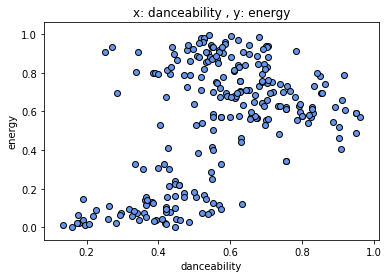

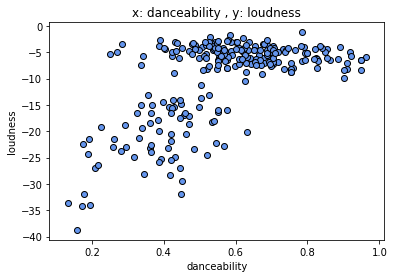

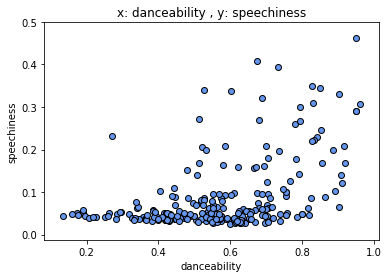

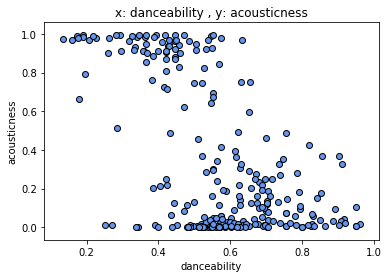

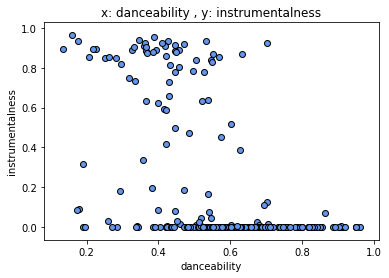

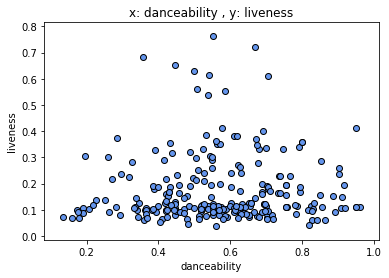

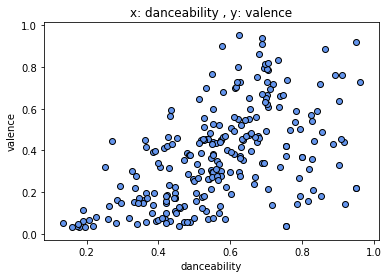

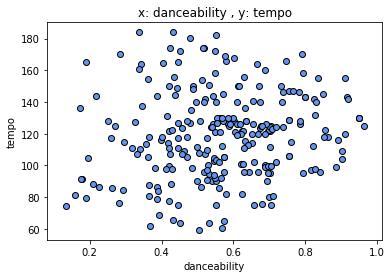

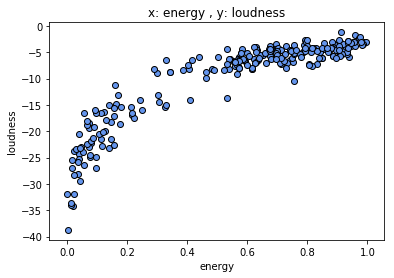

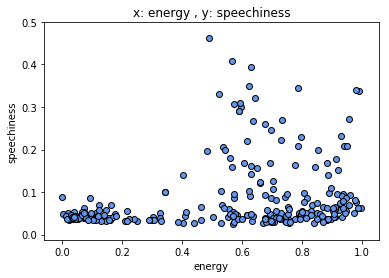

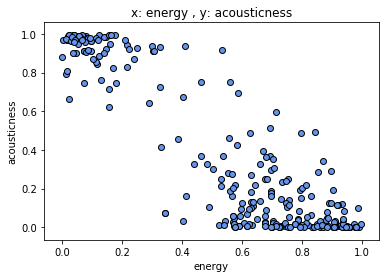

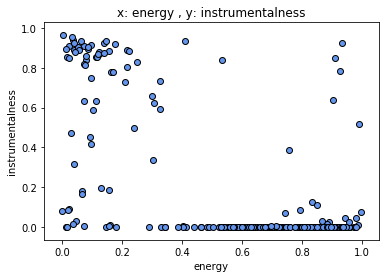

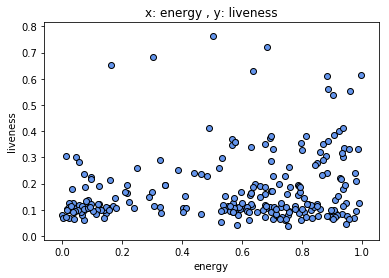

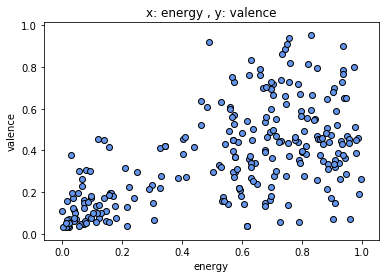

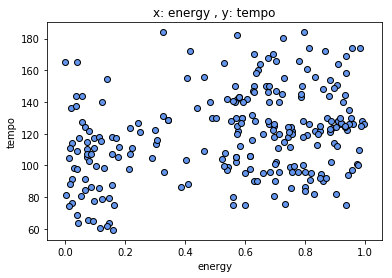

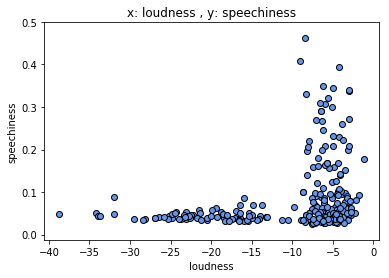

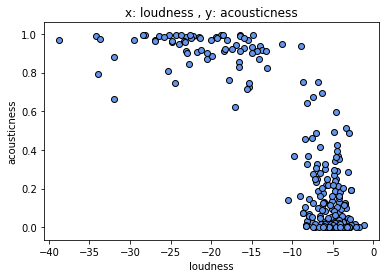

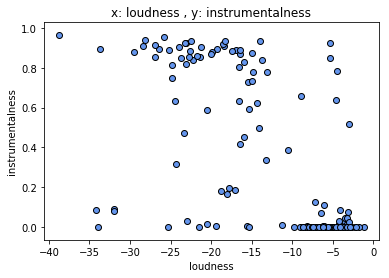

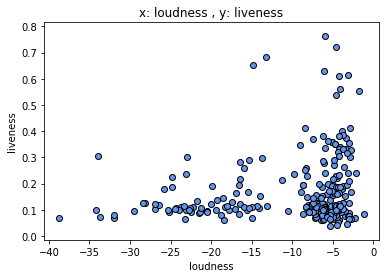

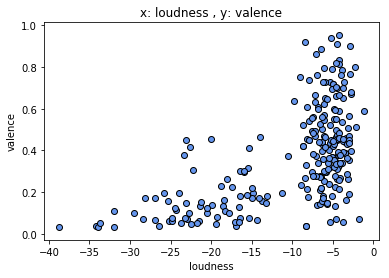

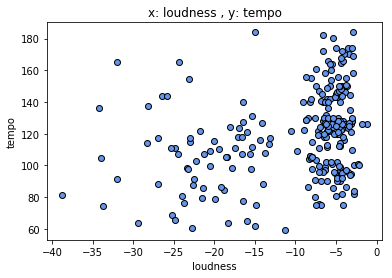

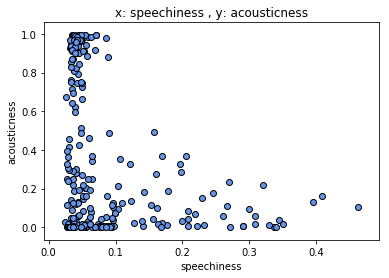

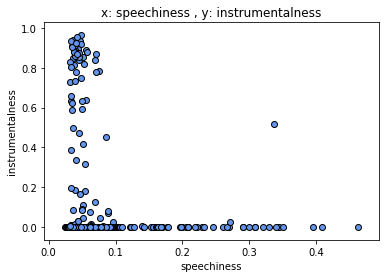

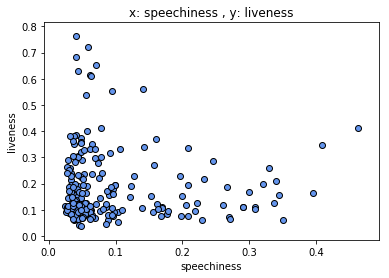

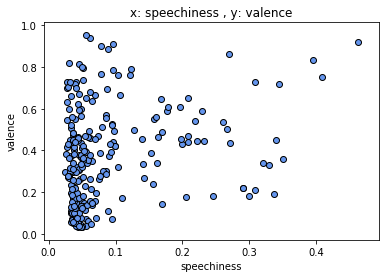

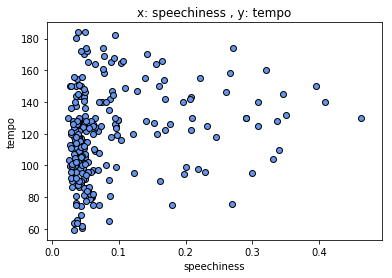

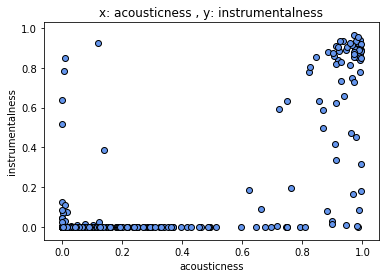

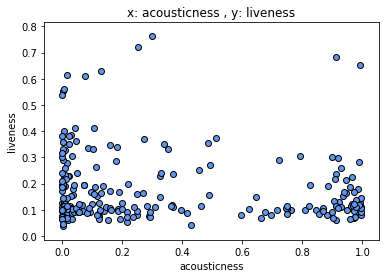

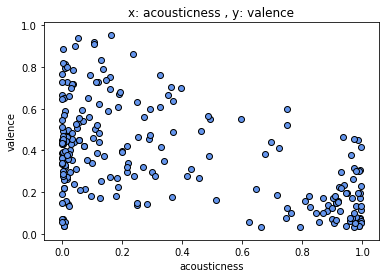

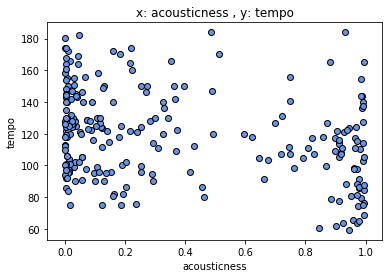

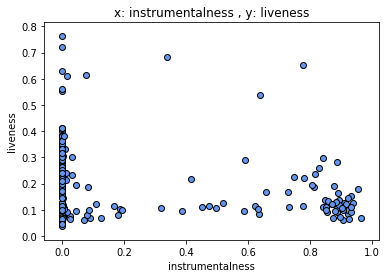

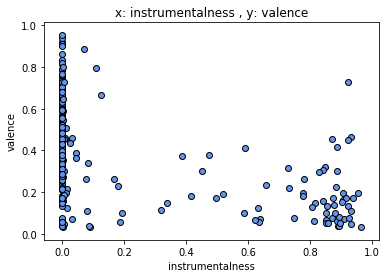

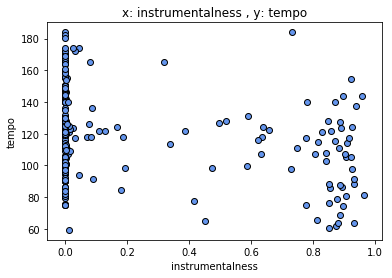

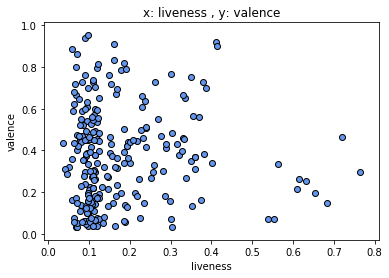

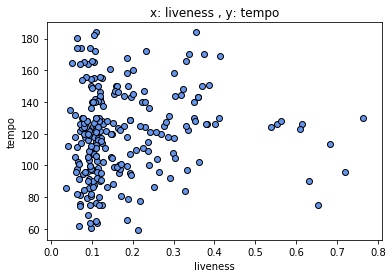

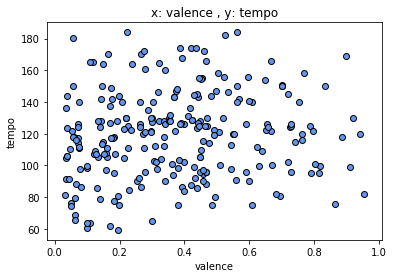

In [54]:
# Plot two features of the dataset against each other
def draw_feature_comparison():    
    for feature_index in range(len(attribute_names)):
        for feature_index2 in range(feature_index, len(attribute_names)):
            if feature_index == feature_index2:
                # don't need to compare with itself
                continue
                
            plt.scatter(original_x[:, feature_index], original_x[:, feature_index2], color=scatter_color, edgecolor="k")
            plt.xlabel(attribute_names[feature_index])
            plt.ylabel(attribute_names[feature_index2])
            
            title = "x: " + attribute_names[feature_index] + " , y: " + attribute_names[feature_index2]
            plt.title(title)
            plt.show()
            
draw_feature_comparison()

Some of our initial observations include:
- Possible positive correlations and linear fits between *danceability* and *energy*, *danceability* and *loudness*, *danceability* and *valence*, and *energy* and *valence*. Given that all of these features describe songs that are high in positivity, rhythm, and upbeatness, it is not surprising that these relationships exist.
- Possible negative correlations between *energy* and *acousticness* and *danceability* and *acousticness*, which makes intuitive sense since acoustic music does not utilize electronic, more upbeat instrumentation.
- *Energy* appears to relate to *loudness* and could be modeled easily with a logarithmic function
- As *loudness* increases, *valence* appears to increase exponentially

Some attributes that we found to not be as useful were:
- *time signature* - As mentioned in our histogram exercise, mostly all of the songs followed a 4/4 time signature so it makes sense that it does not provide adequate information gain or predictive power for any other attribute
- *duration_ms* - Although there were some outliers, the distribution for duration (in milliseconds) was skewed left for all genres.
- *key* and *mode* - key and modality did not seem to be indicative of any genre


### 2. Line fitting: Loudness vs. Energy
We highlight the relationship between loudness and energy by fitting a line to the log of the data.


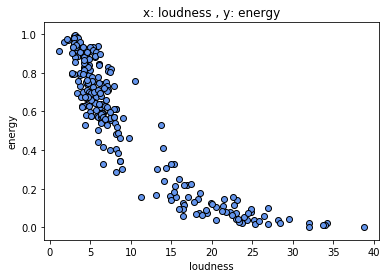

In [40]:
attribute1 = "loudness"
attribute2 = "energy"

index1 = attribute_names.index(attribute1)
index2 = attribute_names.index(attribute2)

# let's go ahead and make loudness positive so we can take the log later
data1 = -original_x[:, index1]
data2 = original_x[:, index2]

plt.xlabel(attribute1)
plt.ylabel(attribute2)
title = "x: " + attribute1 + " , y: " + attribute2
plt.title(title)

plt.scatter(data1, data2, color=scatter_color, edgecolor="k")
plt.show()

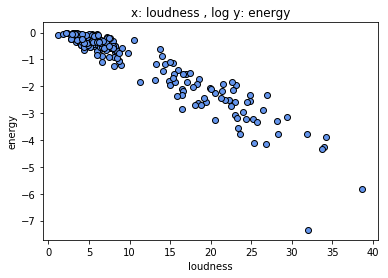

In [39]:
log_data1 = np.log(data1)
log_data2 = np.log(data2) 

log_data1 = np.reshape(log_data1, (-1, 1))
log_data2 = np.reshape(log_data2, (-1, 1))

plt.xlabel(attribute1)
plt.ylabel(attribute2)
title = "x: " + attribute1 + " , log y: " + attribute2
plt.title(title)

plt.scatter(data1, log_data2, color=scatter_color, edgecolor="k")
plt.show()

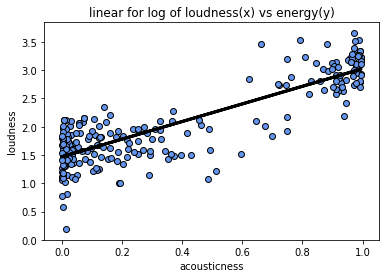

linear model: 1.556064979264715*x + 1.4697268363018088


In [59]:
import matplotlib.pyplot as plt
from sklearn import linear_model
lm = linear_model.LinearRegression()

#logx = [np.log(value) for value in data1]
logy = [np.log(value) for value in data2]

#logx = np.reshape(logx, (-1, 1))
data1 = np.reshape(data1, (-1, 1))
logy = np.reshape(logy, (-1, 1))

lm.fit(data1, logy)
logy_predictions = lm.predict(data1)
plt.scatter(data1, logy,  color=scatter_color, edgecolor="k")
plt.plot(data1, logy_predictions, color=line_color, linewidth=3)
plt.title("linear for log of loudness(x) vs energy(y)")

plt.xlabel(attribute1)
plt.ylabel(attribute2)
plt.show()


intercept = lm.intercept_[0]
slope = lm.coef_[0][0]

print("linear model: {0}*x + {1}".format(slope,intercept))

###  2. Line fitting: Acousticness vs. Loudness
We highlight the relationship between loudness and acousticness by fitting a line to the log of the data.

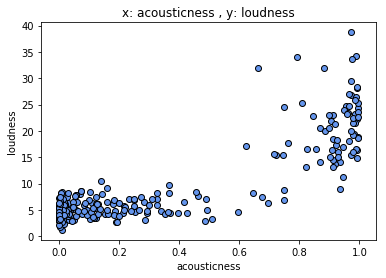

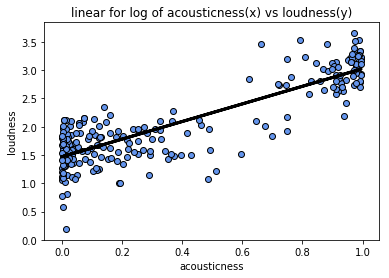

Linear model: 1.556064979264715*x + 1.4697268363018088


In [52]:
# to do: acousticness vs loudness:
attribute1 = "acousticness"
attribute2 = "loudness"

index1 = attribute_names.index(attribute1)
index2 = attribute_names.index(attribute2)

# let's go ahead and make loudness positive so we can take the log later
data1 = original_x[:, index1]
data2 = -original_x[:, index2]

plt.xlabel(attribute1)
plt.ylabel(attribute2)
title = "x: " + attribute1 + " , y: " + attribute2
plt.title(title)

plt.scatter(data1, data2, color=scatter_color, edgecolor="k")
plt.show()

logy = np.log(data2)
data1 = np.reshape(data1, (-1, 1))
logy = np.reshape(logy, (-1, 1))

lm.fit(data1, logy)
logy_predictions = lm.predict(data1)
plt.scatter(data1, logy,  color=scatter_color, edgecolor="k")
plt.plot(data1, logy_predictions, color=line_color, linewidth=3)
plt.title("linear for log of acousticness(x) vs loudness(y)")

plt.xlabel(attribute1)
plt.ylabel(attribute2)
plt.show()


intercept = lm.intercept_[0]
slope = lm.coef_[0][0]

print("Linear model: {0}*x + {1}".format(slope,intercept))